In [5]:
#install.packages("igraph")
library(igraph)

# Part1
## Question1
### a

In [6]:
p1 <- 0.003
p2 <- 0.004
p3 <- 0.01
p4 <- 0.05
p5 <- 0.1
g1 <- erdos.renyi.game(1000, p1, directed=F)
g2 <- erdos.renyi.game(1000, p2, directed=F)
g3 <- erdos.renyi.game(1000, p3, directed=F)
g4 <- erdos.renyi.game(1000, p4, directed=F)
g5 <- erdos.renyi.game(1000, p5, directed=F)

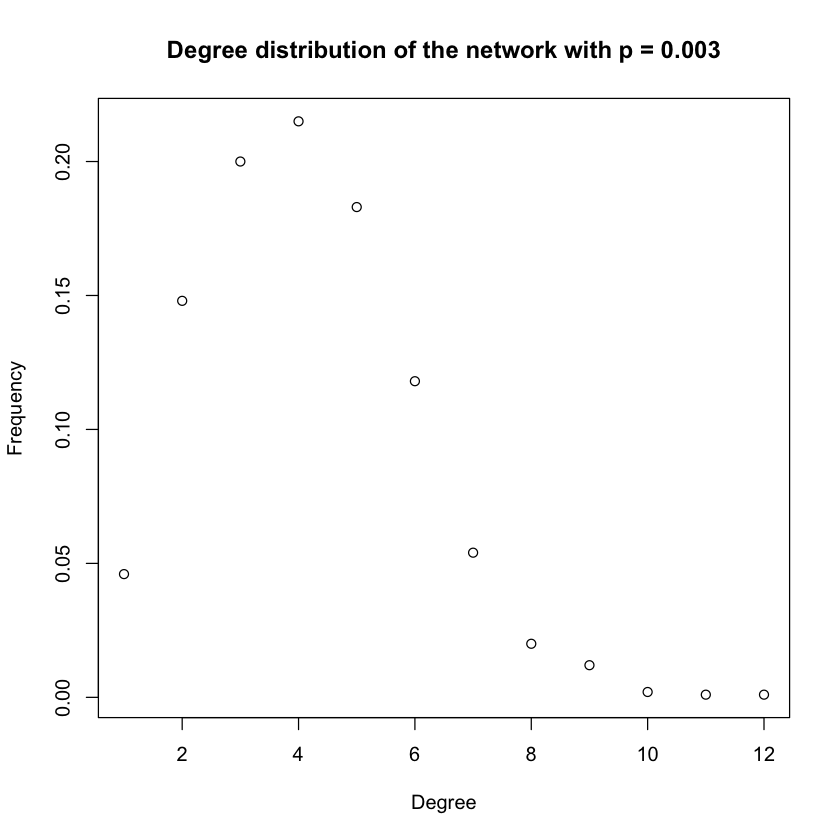

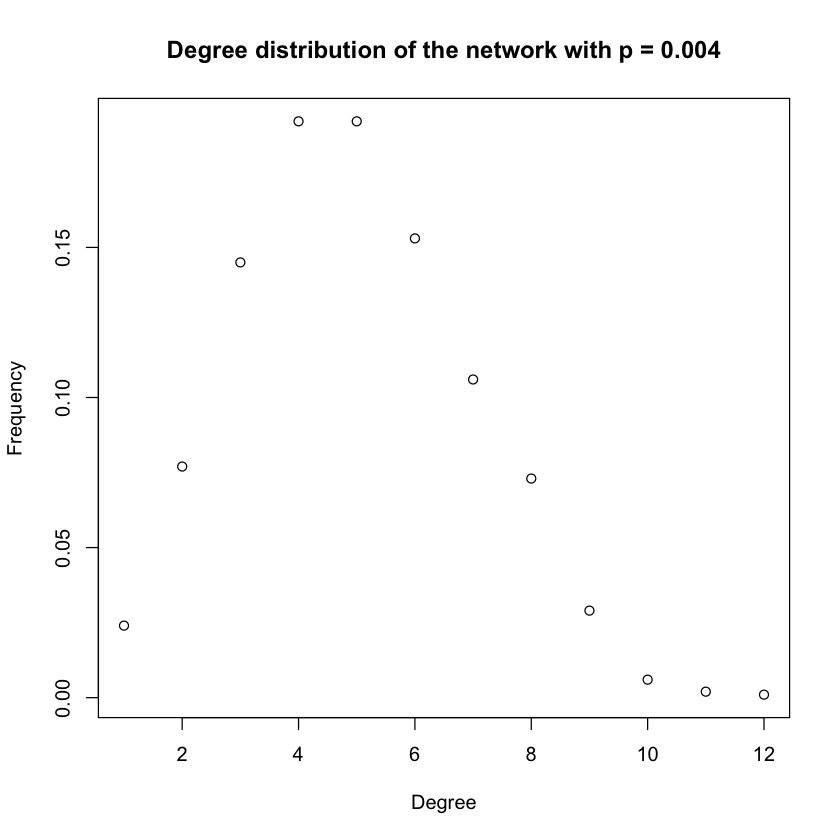

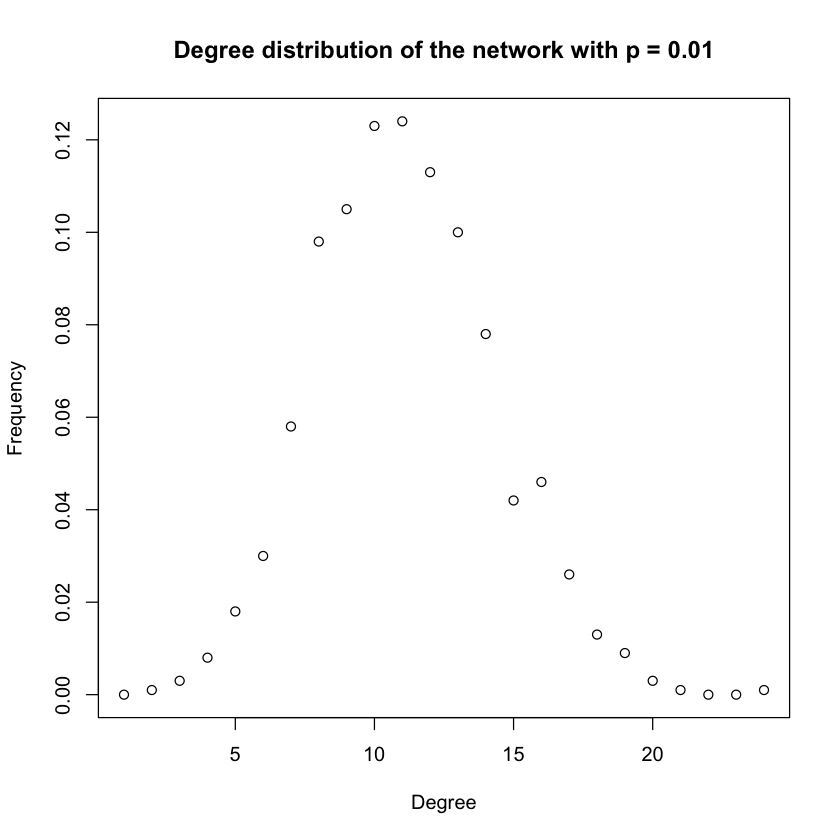

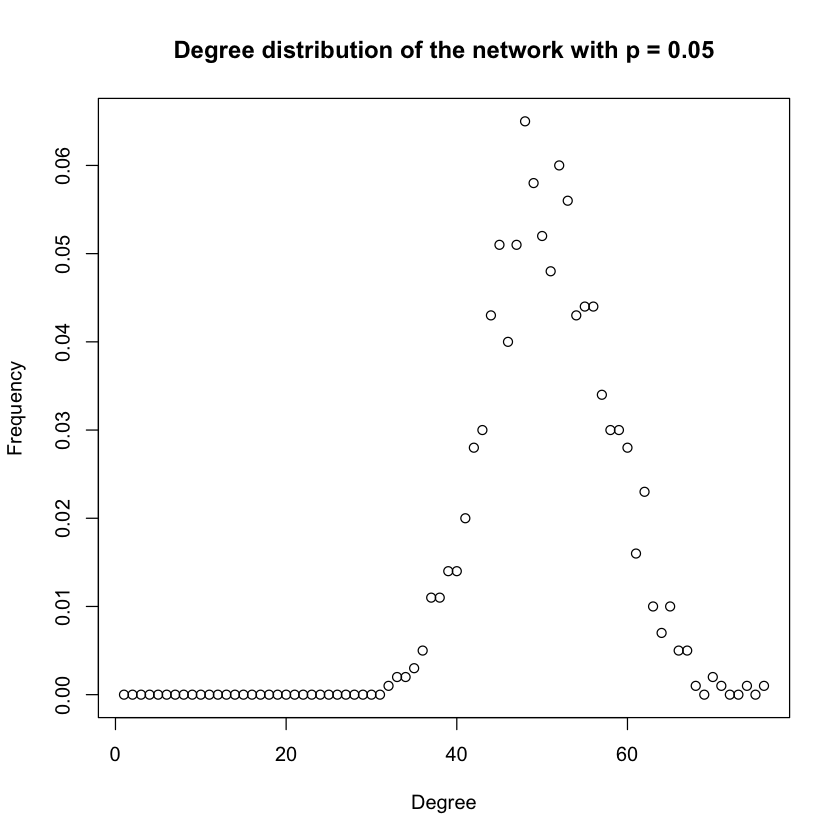

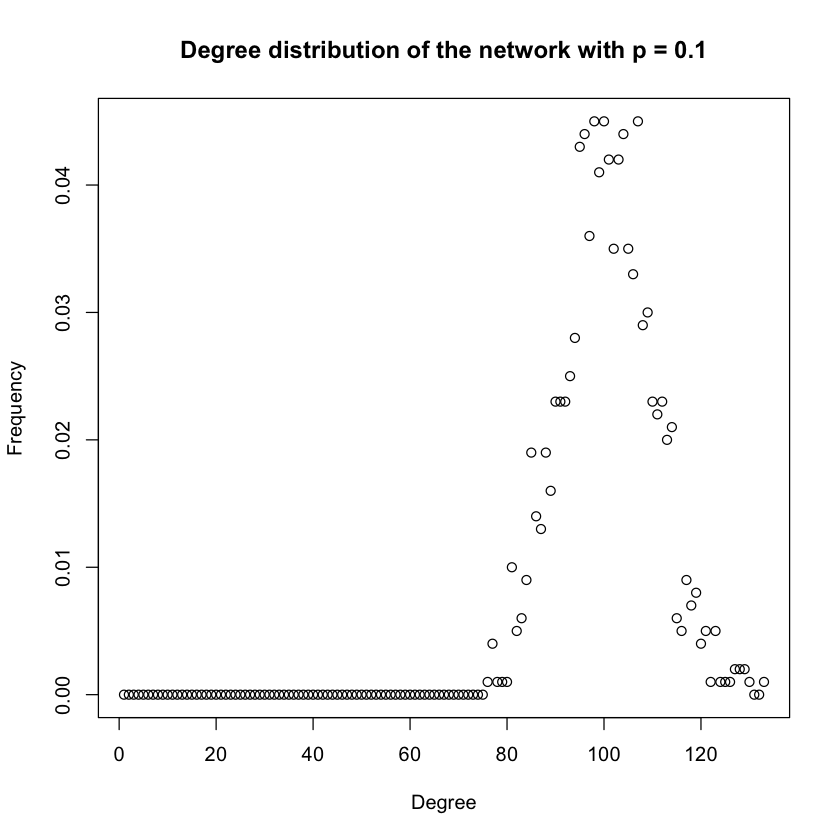

In [7]:
plot(degree.distribution(g1),main="Degree distribution of the network with p = 0.003",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g2),main="Degree distribution of the network with p = 0.004",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g3),main="Degree distribution of the network with p = 0.01",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g4),main="Degree distribution of the network with p = 0.05",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g5),main="Degree distribution of the network with p = 0.1",xlab="Degree",ylab="Frequency")

In [7]:
summary(degree(g1))
var(degree(g1))
summary(degree(g2))
var(degree(g2))
summary(degree(g3))
var(degree(g3))
summary(degree(g4))
var(degree(g4))
summary(degree(g5))
var(degree(g5))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   3.086   4.000  12.000 

[1] 3.129734

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   4.000   3.924   5.000  12.000 

[1] 3.838062

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    8.00   10.00   10.12   12.00   19.00 

[1] 9.661261

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  31.00   45.00   50.00   50.02   55.00   76.00 

[1] 43.56931

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  70.00   93.00   99.00   99.51  106.00  128.00 

[1] 86.47428

The distributions are binomial distributions that skew to their own average degrees, which are the probability p times the number of nodes, 1000. With higher probability, the graph tends to be more likely to have vertices with more edges. Therefore, comparing to p = 0.003, the graph for p = 0.01 starts at degree approximately greater than 75, which means almost all the nodes are connected. The reason for that is the probability p is greater than the threshold, c * ln(1000)/1000, where c is an arbitrary constant. Therefore, from graph 3, the frequency of degree 0 is 0. And the pikes of every graphs are because the probabilities are greater than (np)/n, where np is greater than 1. Under this condition, the graph will be almost sure to have a GCC.  
The theoretical value of the average degree is equal to the total number of nodes times the probability.  
E(g1) = 1000 * 0.003 = 3, which is approximate equal to the empirical mean, 3.01, with 3.33% difference.  
E(g2) = 1000 * 0.004 = 4, which is approximate equal to the empirical mean, 3.938, with 1.55% difference.  
E(g3) = 1000 * 0.01 = 10, which is approximate equal to the empirical mean, 10.13, with 1.3% difference.  
E(g4) = 1000 * 0.05 = 50, which is approximate equal to the empirical mean, 49.85, with 0.30% difference.  
E(g5) = 1000 * 0.1 = 100, which is approximate equal to the empirical mean, 99.49, with 0.51% difference.  
As for variance, the distribution is binomial distribution, meaning the variance is np(1-p).  
V(g1) = 1000 * 0.003 * (1 - 0.003) = 2.991, similar to the empircal value, 3.181, with 6.35% difference.  
V(g2) = 1000 * 0.004 * (1 - 0.004) = 3.984, similar to the empircal value, 4.091, with 2.69% difference.  
V(g3) = 1000 * 0.01 * (1 - 0.01) = 9.9, similar to the empircal value, 9.622, with 2.81% difference.  
V(g4) = 1000 * 0.05 * (1 - 0.05) = 47.5, similar to the empircal value, 45.001, with 5.26% difference.  
V(g5) = 1000 * 0.1 * (1 - 0.1) = 90, similar to the empircal value, 96.160, with 6.84% difference.

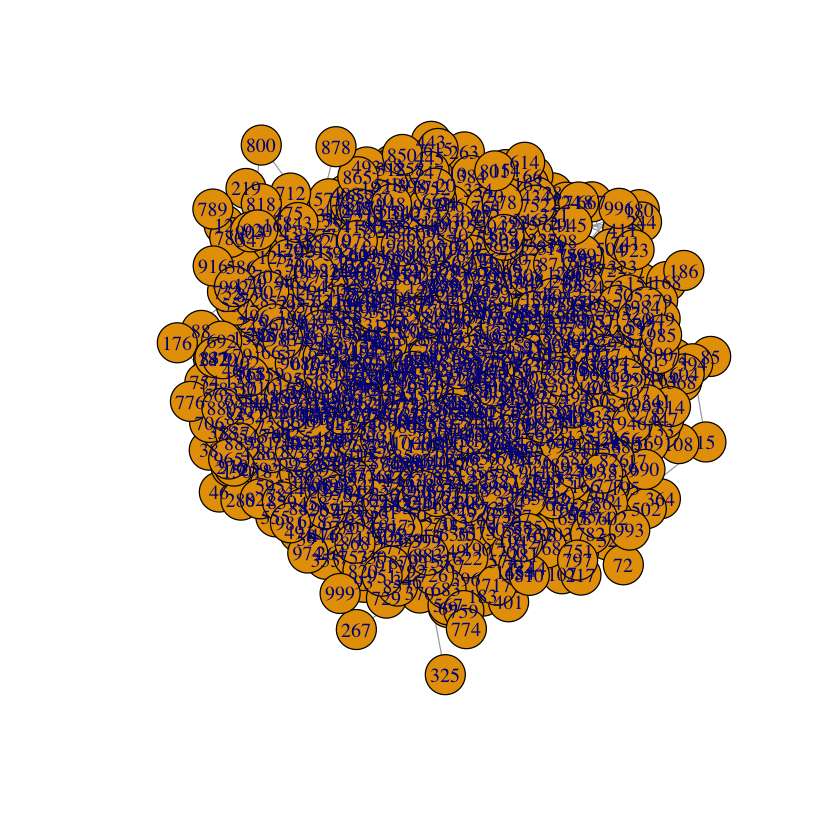

In [12]:
plot(g3)

[1] 6.844444


### c

In [4]:
library(igraph)
indices <- seq(0.1,2,0.05)
q <- seq(1,100,1)
print(indices)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



 [1] 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70 0.75 0.80
[16] 0.85 0.90 0.95 1.00 1.05 1.10 1.15 1.20 1.25 1.30 1.35 1.40 1.45 1.50 1.55
[31] 1.60 1.65 1.70 1.75 1.80 1.85 1.90 1.95 2.00


[1] 0.02028
[1] 0.11076
[1] 0.48462
[1] 0.69909
[1] 0.81306
[1] 0.88065
[1] 0.9212
[1] 0.94758
[1] 0.964
[1] 0.97707
[1] 0.98387
[1] 0.98827
[1] 0.99196
[1] 0.99388
[1] 0.99604
[1] 0.99727
[1] 0.99807
[1] 0.99867
[1] 0.99888
[1] 0.9993
[1] 0.99939
[1] 0.99974
[1] 0.99972
[1] 0.99983
[1] 0.99989
[1] 0.99992
[1] 0.99994
[1] 0.99997
[1] 0.99993
[1] 0.99997
[1] 0.99999
[1] 0.99998
[1] 0.99998
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0.99998


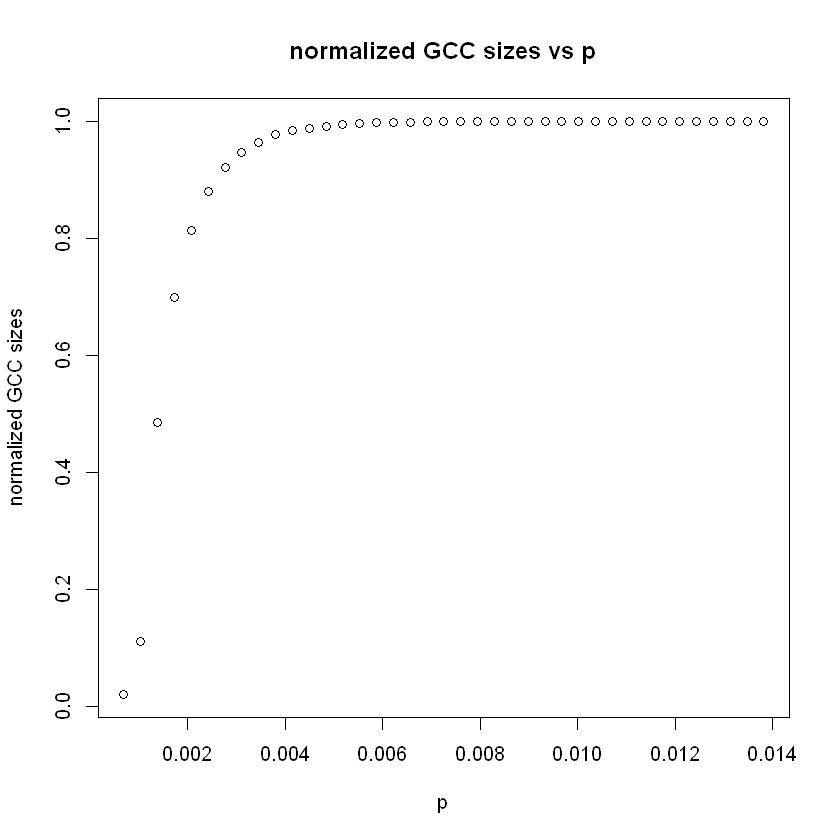

In [5]:
mylist <- list()
plist<- list()
for(v in indices){
    p1 <- v*log(1000)/1000
    result<-0
    for(i in q ){
        g1 <- erdos.renyi.game(1000, p1, directed=F)
        g1.components <- clusters(g1)
        x <- g1.components$csize
        result=max(x)+result
        }
    result=result/100/1000
    print(result)
    mylist<- c(mylist, list(result))
    plist<- c(plist, list(p1))
}
plot(plist,mylist,main="normalized GCC sizes vs p",xlab="p",ylab="normalized GCC sizes")

### From the graph we could empirically estimate that giant connected component starts to emerge at around 0.007.Theoretical value is 0.0069 so the estimation matches with it.